## K-Means on Wine Data Set

In [147]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [121]:
#importing data

red_dataset = pd.read_csv('winequality-red.csv', sep=';')
white_dataset = pd.read_csv('winequality-white.csv', sep=';')

#red & white data merged
wine_dataset = pd.concat([red_dataset, white_dataset])


samples, attributes = wine_dataset.shape


### Filtering the Dimensionality based on Correlation and Variance

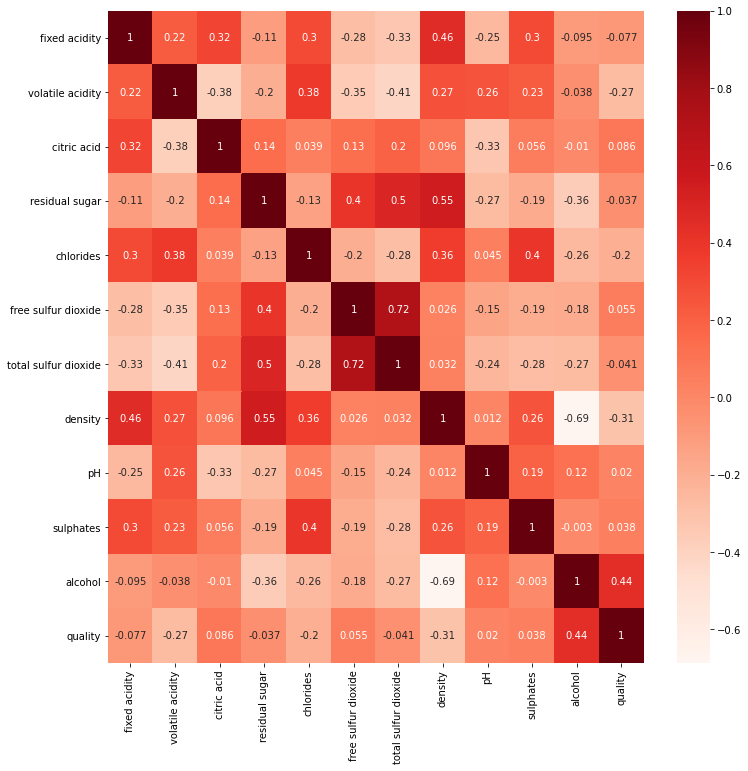

In [149]:
#viewing correlation between attributes

plt.figure(figsize=(attributes,attributes))
att_corr = wine_dataset.corr()
sns.heatmap(att_corr, annot=True, cmap=plt.cm.Reds)
plt.show()

In [158]:
#Selecting highly correlated features
abs_corr = abs(att_corr)
high_corr = att_corr[att_corr>0.5]
high_corr


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
volatile acidity,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
citric acid,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
residual sugar,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,0.552517,NaN,NaN,NaN,NaN
chlorides,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
free sulfur dioxide,NaN,NaN,NaN,NaN,NaN,1.000000,0.720934,NaN,NaN,NaN,NaN,NaN
total sulfur dioxide,NaN,NaN,NaN,NaN,NaN,0.720934,1.000000,NaN,NaN,NaN,NaN,NaN
density,NaN,NaN,NaN,0.552517,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
pH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
sulphates,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN


In [139]:
#viewing variance of each attribute and sorting them
att_var = np.var(wine_dataset, axis=0)
att_var = att_var.sort_values()
print(att_var)

density                    0.000009
chlorides                  0.001227
citric acid                0.021114
sulphates                  0.022140
pH                         0.025849
volatile acidity           0.027101
quality                    0.762457
alcohol                    1.422342
fixed acidity              1.680482
residual sugar            22.633212
free sulfur dioxide      314.992702
total sulfur dioxide    3194.228316
dtype: float64


In [233]:
#Will reduce dimensionality based on both correlation and variance
#through the variance, we see that the 2 highest variance attributes are:
#free sulfur oxide, and total sulfur oxide
#but because the correlation between these two variables are high, we will take
#the total sulfur dioxide, and residual sugar

lowD_dataset = wine_dataset.drop(['density', 'chlorides', 'citric acid', 'sulphates', 
                                 'pH', 'volatile acidity', 'quality', 'residual sugar', 
                                 'free sulfur dioxide', 'total sulfur dioxide'], axis=1)


lowD_dataset

,fixed acidity,alcohol
0,7.4,9.4
1,7.8,9.8
2,7.8,9.8
3,11.2,9.8
4,7.4,9.4
...,...,...
4893,6.2,11.2
4894,6.6,9.6
4895,6.5,9.4
4896,5.5,12.8


In [234]:
#Scaling attribute data
lowD_dataset[lowD_dataset.columns] = StandardScaler().fit_transform(lowD_dataset)
lowD_dataset

,fixed acidity,alcohol
0,0.142473,-0.915464
1,0.451036,-0.580068
2,0.451036,-0.580068
3,3.073817,-0.580068
4,0.142473,-0.915464
...,...,...
4893,-0.783214,0.593818
4894,-0.474652,-0.747766
4895,-0.551792,-0.915464
4896,-1.323198,1.935402


In [235]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(lowD_dataset)

In [236]:
print(kmeans.labels_,'\n', kmeans.cluster_centers_)

[1 1 1 ... 1 0 0] 
 [[-0.33787588  1.0300774 ]
 [ 0.21326135 -0.65016686]]


[ 0.14247327  0.45103572  0.45103572 ... -0.55179227 -1.32319841
 -0.93749534]


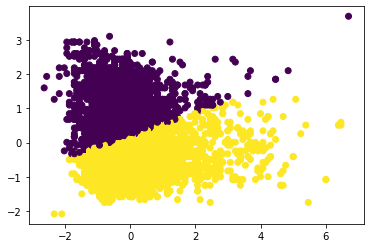

In [237]:
arr = np.array(lowD_dataset)
#plt.figure(figsize=(12, 12))
print(arr[:,0])
plt.scatter(arr[:,0], arr[:,1], c=kmeans.labels_)

### PCA